<a href="https://colab.research.google.com/github/ysun155/Math140-PROJECT/blob/main/2bed_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

In [1]:
!pip install statsmodels==0.11.0
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.7 MB 24.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 32.3 MB/s 


In [3]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [4]:
# To get csv from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import data
# df = pd.read_csv (r'2bed.csv', names = ['value'], header = 0)
# print (df)

filepath = '/content/drive/Shareddrives/Math140Project/coding/csv data for each type/2bed.csv'
df = pd.read_csv (filepath, names = ['value'], header = 0)
print (df)

           value
Nov, 2014   2300
Dec, 2014   2277
Jan, 2015   2204
Feb, 2015   2356
Mar, 2015   2503
...          ...
Dec, 2021   3011
Jan, 2022   3202
Feb, 2022   3133
Mar, 2022   3382
Apr, 2022   3483

[90 rows x 1 columns]


In [6]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.603119
p-value: 0.482027


Since P-value is greater than the significance level ( P> 0.05), let’s difference the series and see how the autocorrelation plot looks like.

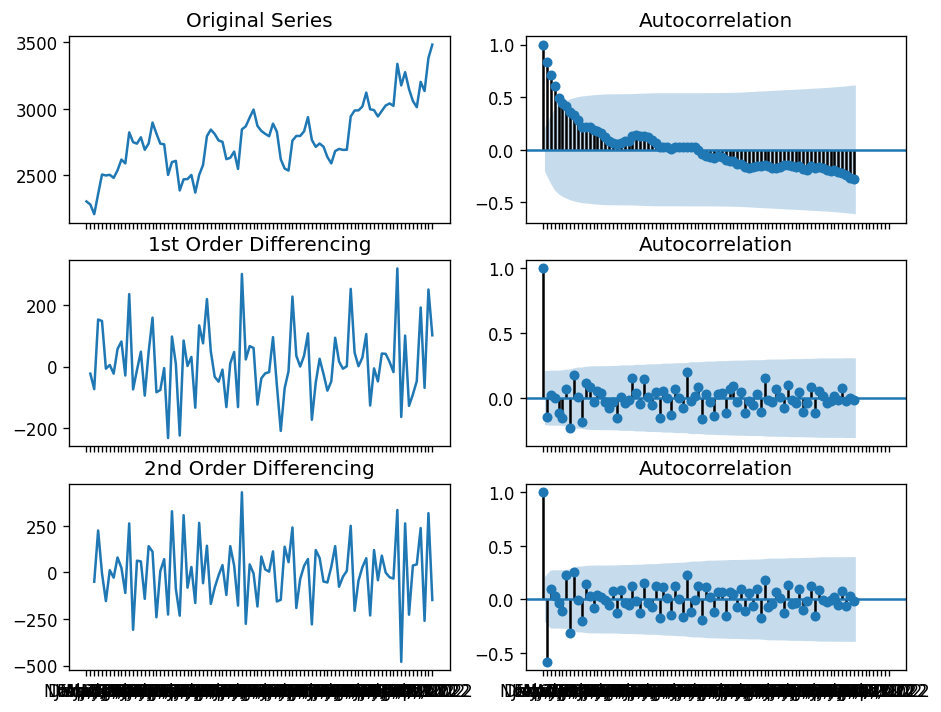

In [7]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1], lags=80)


# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=80)

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=80)

plt.show()

For the above series, the time series reaches stationarity with one orders of differencing. 
So, I am going to fix the order of differencing as 1.

In [9]:
from pmdarima.arima.utils import ndiffs
df = pd.read_csv(filepath, names=['value'], header=0)
y = df.value

## Adf Test
ndiffs(y, test='adf') 

# KPSS test
ndiffs(y, test='kpss')  

# PP test:
ndiffs(y, test='pp') 

0

find the order of the AR term (p)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


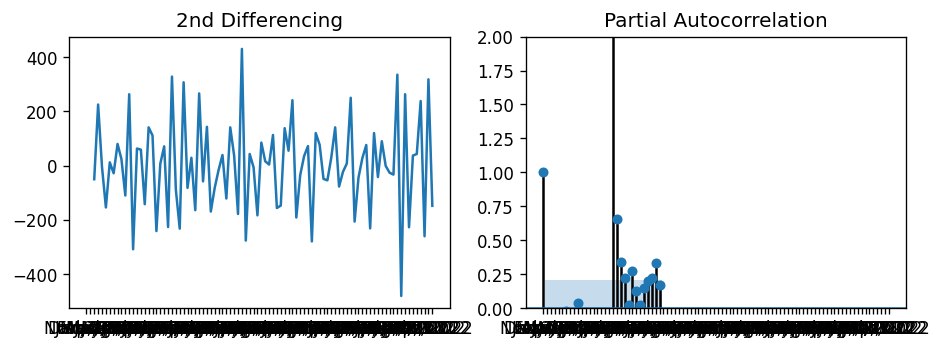

In [41]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,2))
plot_pacf(df.value.diff().diff().dropna(), ax=axes[1], lags=30)

plt.show()

You can observe that the PACF lag 1 is quite significant. I am going to fix the p as 1.

find the order of the MA term (q)

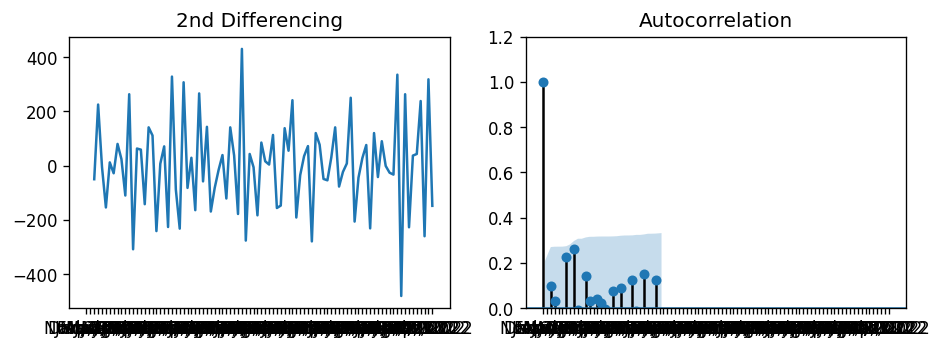

In [42]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().diff().dropna(), ax=axes[1], lags=30)

plt.show()

let’s tentatively fix q as 1.

 build the ARIMA Model

In [33]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model = ARIMA(df.value, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   88
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -540.389
Method:                       css-mle   S.D. of innovations            109.381
Date:                Thu, 26 May 2022   AIC                           1088.777
Time:                        01:11:33   BIC                           1098.687
Sample:                    01-01-2015   HQIC                          1092.770
                         - 04-01-2022                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1721      0.399      0.431      0.666      -0.610       0.955
ar.L1.D2.value    -0.1350      0.106     -1.277      0.202      -0.342       0.072
ma.L1.D2.value    -0.9999      0.034

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


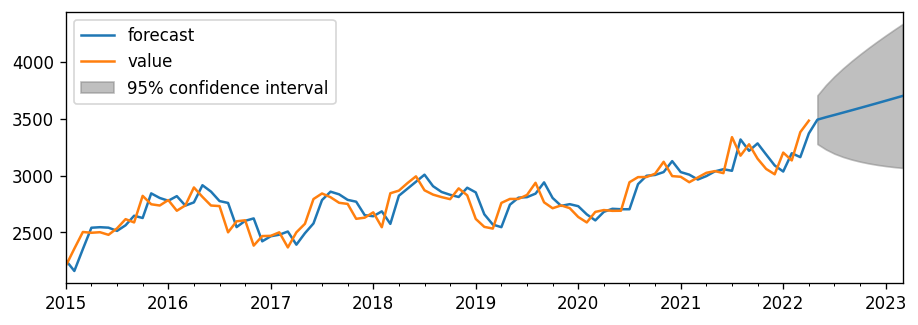

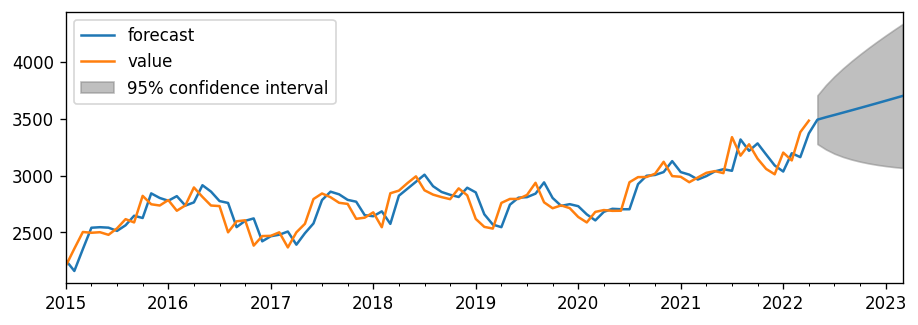

In [34]:
model_fit.plot_predict(2,100)

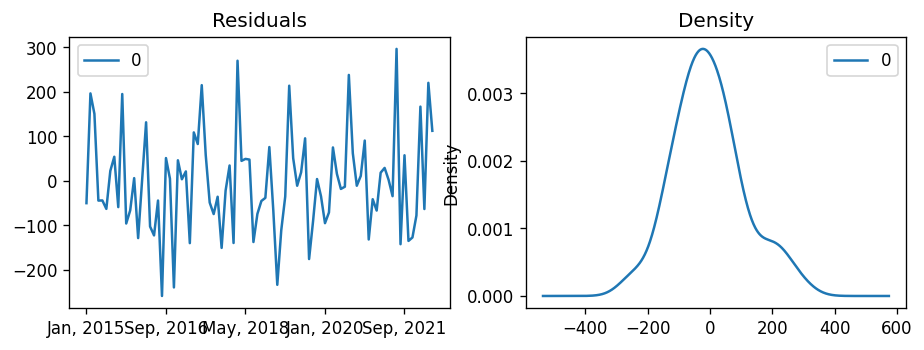

In [35]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


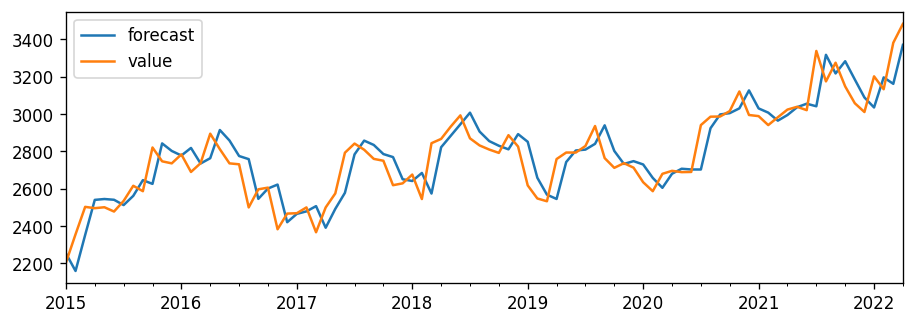

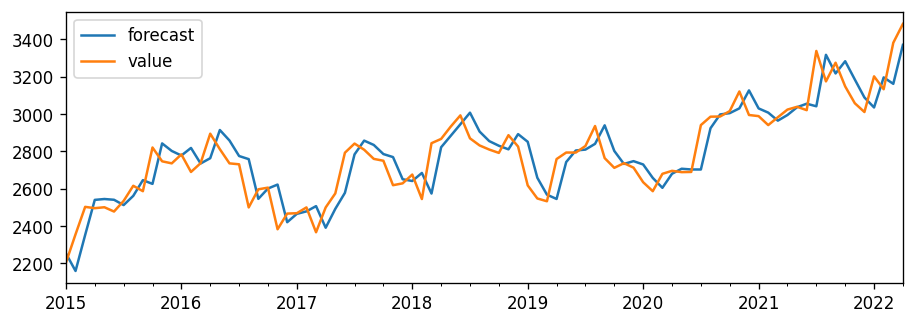

In [36]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)

[2986 2987 3016 3121 2995 2989 2941 2983 3024 3039 3021 3338 3175 3275
 3148 3058 3011 3202 3133 3382 3483]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


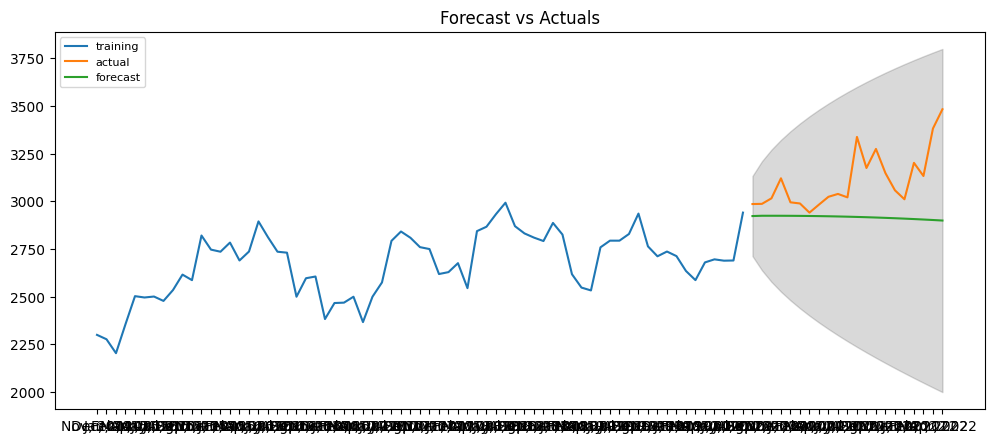

[2922.98210549 2924.58833363 2924.58299449 2924.52841959 2924.30966662
 2923.93519199 2923.40437355 2922.71725708 2921.8738392  2920.87412017
 2919.71809997 2918.4057786  2916.93715606 2915.31223235 2913.53100747
 2911.59348142 2909.4996542  2907.2495258  2904.84309624 2902.28036551
 2899.5613336 ] [107.07927928 145.97568112 176.83056612 203.03345172 226.22695339
 247.25802936 266.63894702 284.70689478 301.69785737 317.78463121
 333.09824407 347.74085527 361.79394505 375.32373912 388.3849302
 401.02330785 413.27766408 425.18120461 436.762614   448.04687312
 459.05589585] [[2713.11057461 3132.85363637]
 [2638.48125602 3210.69541124]
 [2578.00145353 3271.16453544]
 [2526.59016657 3322.46667262]
 [2480.91298564 3367.70634759]
 [2439.31835956 3408.55202442]
 [2400.80164051 3446.00710658]
 [2364.70199715 3480.732517  ]
 [2330.55690455 3513.19077385]
 [2298.02768816 3543.72055219]
 [2266.85753829 3572.57866166]
 [2236.84622632 3599.96533088]
 [2207.83405393 3626.04025819]
 [2179.69122114 365

In [40]:
#out-of-sample forecasting
# split into train and test sets
from statsmodels.tsa.api import ARIMA
size = len(df.value) - 21
train, test = df.value[0:size], df.value[size:]
print(np.array(test))
# fit an ARIMA model
model2 = ARIMA(train, order=(1,2,1))
model2_fit = model2.fit()
# forecast
fc, se, conf = model2_fit.forecast(steps=21, exog=None, alpha=0.05)
#output: forecast,standard error,confidence interval

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

print(fc, se, conf)

In [16]:
#predicted value
model_fit.forecast(steps=12, exog=None, alpha=0.05)
#output: forecast, standard error, confidence interval

(array([3491.88357893, 3513.39684757, 3533.40063194, 3553.80351117,
        3574.34785534, 3595.06844066, 3615.96057287, 3637.02488562,
        3658.26129338, 3679.6698077 , 3701.250427  , 3723.00315152]),
 array([109.38149776, 144.63030877, 173.93633049, 198.84423529,
        220.98051609, 241.09329771, 259.6552941 , 276.97820207,
        293.28170046, 308.72732857, 323.43801198, 337.50986416]),
 array([[3277.49978275, 3706.2673751 ],
        [3229.92665132, 3796.86704383],
        [3192.49168858, 3874.30957531],
        [3164.07597147, 3943.53105088],
        [3141.23400253, 4007.46170815],
        [3122.53426024, 4067.60262109],
        [3107.04554805, 4124.8755977 ],
        [3094.15758507, 4179.89218618],
        [3083.43972315, 4233.08286362],
        [3074.57536265, 4284.76425274],
        [3067.3235723 , 4335.17728171],
        [3061.49597333, 4384.5103297 ]]))